In [1]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.loading import load_video_dataset_local
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
plt.style.use('presentation.mplstyle')
%matplotlib widget
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
analysis_folder = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract"
analysis_folder_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract/"
videos_folder = "/projects/0/einf914/videos/"


In [3]:
refs = {
    "310_20230830": {
        "20230901_Plate310": "20230901_0719_Plate06",
        "20230902_Plate310": "20230902_1343_Plate07",
        "20230903_Plate310": "20230903_1143_Plate07",
        "20230904_Plate310": "20230904_0942_Plate07",
        "20230905_Plate310": "20230905_1345_Plate07",
        # "20230906_Plate310" : "20230906_1220_Plate07",
    },
    "441_20230807": {
        "20230810_Plate441": "20230810_1005_Plate14",
        "20230811_Plate441": "20230811_1605_Plate14",
        "20230812_Plate441": "20230812_1006_Plate14",
        "20230813_Plate441": "20230813_1618_Plate14",
    },
    "449_20230807": {
        "20230813_Plate449": "20230813_1606_Plate10",
        "20230814_Plate449": "20230814_1019_Plate10",
        "20230815_Plate449": "20230815_1021_Plate10",
        "20230816_Plate449": "20230816_1027_Plate10",
        # "20230818_Plate449": "20230818_1107_Plate10",
    },
}

In [4]:
plate_id = "441_20230807"
indexes = refs[plate_id]

In [5]:
all_infos = pd.DataFrame()

for plate_id_video in list(indexes.keys()):
    print(plate_id_video)
    data_obj = load_video_dataset_local(plate_id_video, videos_folder, analysis_folder, analysis_folder_root)
    for index, vid_obj in enumerate(data_obj.video_objs):
        if os.path.exists(vid_obj.edge_adr):
            plt.close("all")
            edge_data_csv = pd.read_csv(vid_obj.edge_adr)
            edge_data_csv['mode'] = vid_obj.dataset['mode']
            edge_data_csv['xpos'] = vid_obj.dataset['xpos']
            edge_data_csv['ypos'] = vid_obj.dataset['ypos']
            edge_data_csv['plate_id'] = vid_obj.dataset['plate_id']
            edge_data_csv['video_int'] = vid_obj.dataset['video_int']
            edge_data_csv['unique_id'] = vid_obj.dataset['unique_id']
            
            
            all_infos = pd.concat([all_infos,edge_data_csv])

20230810_Plate441
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\029\Img\edges_data.csv. Check analysis for 20230810_Plate441_029
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\047\Img\edges_data.csv. Check analysis for 20230810_Plate441_047
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\053\Img\edges_data.csv. Check analysis for 20230810_Plate441_053
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\097\Img\edges_data.csv. Check analysis for 20230810_Plate441_097
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\102\Img\edges_data.csv. Check analysis for 20230810_Plate441_102
20230811_Plate441

In [6]:
all_infos['load'] = all_infos['betweenness_automate']/all_infos['width_automate']**2
all_infos['load2'] = all_infos['betweenness_derivative']/all_infos['width_automate']**2

all_infos['diff_left'] = np.abs(np.abs(all_infos['speed_left']) - 3.15)
all_infos['diff_right'] = np.abs(np.abs(all_infos['speed_right']) - 3.15)

# Assign 'speed_lipid' and 'speed_other' based on which speed is closer to 3.15
all_infos['speed_lipid'] = np.where(all_infos['diff_left'] <= all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_lipid_abs'] = np.abs(all_infos['speed_lipid'])

all_infos['speed_other'] = np.where(all_infos['diff_left'] > all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other_abs'] = np.abs(all_infos['speed_other'])
all_infos['neg_speed_other_abs'] = -np.abs(all_infos['speed_other'])

all_infos['speed_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_sub'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_right'], all_infos['speed_left'])
all_infos['speed_sub_abs'] = np.abs(all_infos['speed_sub'])

all_infos['speed_main_abs'] = np.abs(all_infos['speed_main'])
all_infos['coverage_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['coverage_left'], all_infos['coverage_right'])

# Drop the intermediate 'diff_left' and 'diff_right' columns if they are no longer needed
all_infos = all_infos.drop(['diff_left', 'diff_right'], axis=1)

In [7]:
all_infos['aligned'] = -np.sign(all_infos['betweenness_derivative']*all_infos['flux_avg'])
all_infos['aligned2'] = np.sign(all_infos['flux_avg'])

In [58]:
all_infos[all_infos['unique_id']=="20230812_Plate441_098"]['betweenness_QC']

0    856.307750
1    877.495884
2      7.062711
Name: betweenness_QC, dtype: float64

In [59]:
all_infos[all_infos['unique_id']=="20230812_Plate441_098"]['flux_avg']

0    58.307446
1    65.032852
2    70.784294
Name: flux_avg, dtype: float64

In [25]:
plate_id_video = "20230812_Plate441"
data_obj = load_video_dataset_local(plate_id_video, videos_folder, analysis_folder, analysis_folder_root)


Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230812_Plate441\053\Img\edges_data.csv. Check analysis for 20230812_Plate441_053


In [60]:
vid_obj = data_obj.video_objs[97]
vid_obj.dataset

imaging_day                                                     20230812
storage_path                                  Dropbox\DATA\CocoTransport
plate_id                                               20230812_Plate441
root                                                              Carrot
strain                                                                C2
treatment                                                   001P100N100C
crossing_day                                                    20230807
video_int                                                             98
time_(s)                                                            10.0
mode                                                                   F
exposure_time_(us)                                              400000.0
fps                                                                  2.0
binning                                                                2
gain                                               

0 49.37596995990777
1 77.7901712364178
2 78.82874659949721


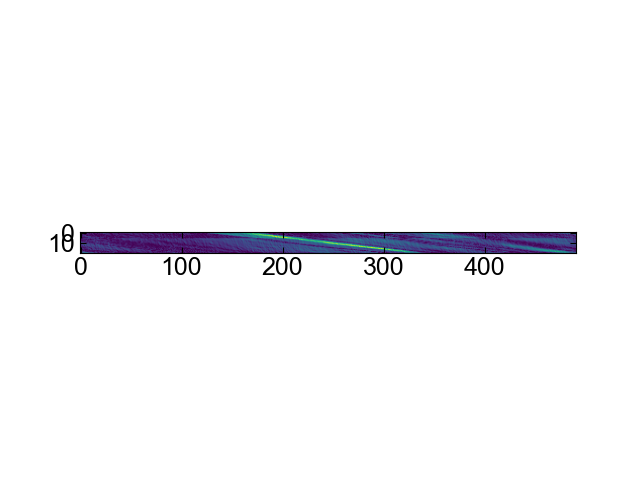

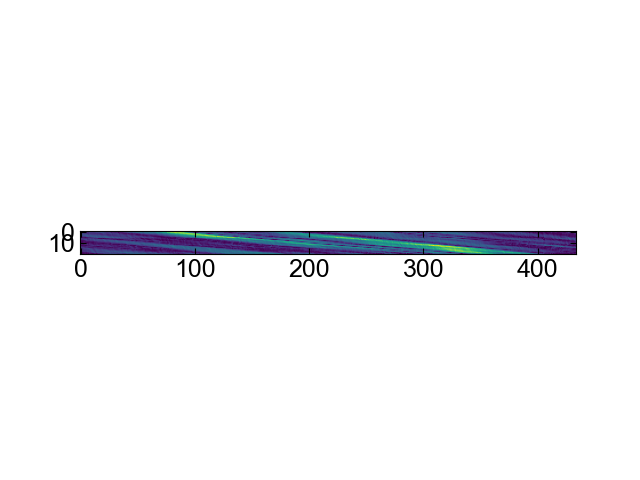

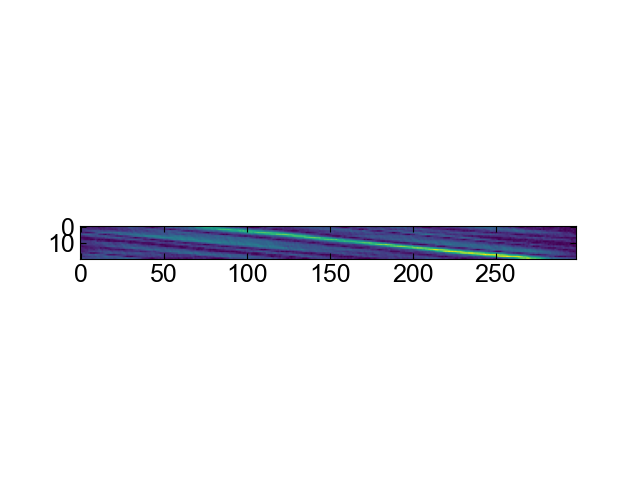

In [61]:
from tifffile import imwrite, imread
from pathlib import Path, PurePath
for i in range(3):
    edge_obj = vid_obj.edge_objs[i]
    kymo_tiff = imread(
        Path(f"{edge_obj.mean_data['analysis_folder']}{edge_obj.mean_data['folder']}")
        / f"edge {edge_obj.mean_data['edge_name']}"
        / f"{edge_obj.mean_data['edge_name']}_kymos_array.tiff"
    )[2]
    print(i,np.mean(kymo_tiff)*edge_obj.return_speed_medians()[1])
    fig,ax = plt.subplots()
    ax.imshow(kymo_tiff)